This is the logistic iterations formula: 

$$
x_{n + 1} = rx_{n}(1 - x_n)
$$

The system experience Chaos for certain value of $r\in [2.4, 4.0]$, find that and plot the infinite bifurcations graphs. 

To do this, we might need some good data set for figuring out the steady state of the logistic iterations. 

Let's assume that, after 1000 iterations, the logistic iterations reaches a steady state, and after that, $2^{12}$ iterations is the period. 

We will need: 
* A set to store all the values of the steady states of the iterations, in julia, implemented via the hashset from the standard library, or you know, use some kind of library. 
* The plotting modules for visualizing the bifurcation diagram. 

Programming Wise: 
* DataStructures.jl https://juliacollections.github.io/DataStructures.jl/v0.8/index.html
* ~~Plots.jl~~
* Juliaimages.jl https://juliaimages.org/v0.19/install/

In [130]:
using DataStructures
using Plots
using Colors, Images, ImageView

struct CoordsToIndices
    # Given a window opened on the coordinate system and the number of pixels: Width, height, need to view the coordinate
    # We need to find an easy way to convert coordinate system into indices on the images. 
    XTopLeft:: Float64
    YTopLeft:: Float64
    XBottomRight :: Float64
    YBottomRight :: Float64
    Width :: Int64
    Height :: Int64
    function CoordsToIndices(coord1:: Tuple{Number, Number},
                             coord2:: Tuple{Number, Number},
                             width :: Int64,
                             height:: Int64)
        X1, Y1 = coord1
        X2, Y2 = coord2
        if !(X1 < X2 && Y1 > Y2)
            throw("Coordinate 1 is the top left, and Coordinate 2 is the bottom right.")
        end
        if !(width >= 1 && height >= 1)
            throw("The height and width of the window has to be larger than 1 by 1")
        end
        new(X1, Y1, X2, Y2, width, height)
    end
end

function GetImageIndices(obj::CoordsToIndices, x, y)
    HeightInCoords  = obj.YTopLeft - obj.YBottomRight
    WidthInCoords   = obj.XBottomRight - obj.XTopLeft
    OffSetXInCoords = x - obj.XTopLeft
    OffSetYInCoords = obj.YTopLeft - y
    OffSetXRatio    = OffSetXInCoords/WidthInCoords
    OffSetYRatio    = OffSetYInCoords/HeightInCoords
    OffSetXPixel    = ceil(OffSetXRatio*obj.Width)
    OffSetYPixel    = ceil(OffSetYRatio*obj.Height)
    return trunc(Int64, OffSetYPixel), trunc(Int64, OffSetXPixel)
end

function SteadyLogistic(r:: Union{Int64, Float64})
    function roundit(n:: Float64)  # eliminate Numerical round off errors. 
        n = n*1e13
        n = round(n)
        return n*1e-13
    end
    x0 = rand()
    for II = 1: 1000
        x0 = r*x0*(1 - x0)
    end
    UniqueValues = OrderedSet{Number}()
    
    for II = 1: 2^8
        push!(UniqueValues, roundit(x0))
        x0 = r*x0*(1 - x0)
    end
    return UniqueValues
end

SteadyLogistic (generic function with 1 method)

Let's Define a type that is going to help us with plotting. 

In [151]:
XL = 2.3
XR = 4
H  = 2160
W  = 3840
TheImageMatrix = zeros(H, W)
Canvas = CoordsToIndices((XL, 1), (XR, 0), W, H)
for II = range(2.4, 4, length=W)
    YValues = collect(SteadyLogistic(II))
    for JJ = YValues
        idx1, idx2 = GetImageIndices(Canvas, II, JJ)
        TheImageMatrix[idx1, idx2] = 1
    end
end

Img = Gray.(TheImageMatrix)
save("Logistc Bifurcations.png", Img)

### Scratch Paper works: 

In [50]:
repeat([1], 10)

10-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [27]:
# rounding(0.3)
methods(round)
round()

# 63 methods for generic function "round":
[1] round(::Type{BigInt}, x::BigFloat, r::RoundingMode) in Base.MPFR at mpfr.jl:299
[2] round(::Type{BigInt}, x::BigFloat, r::Union{Base.MPFR.MPFRRoundingMode, RoundingMode}) in Base.MPFR at mpfr.jl:296
[3] round(x::Float32, r::RoundingMode{:Nearest}) in Base at float.jl:377
[4] round(x::Float32, r::RoundingMode{:Up}) in Base at float.jl:375
[5] round(x::Float32, r::RoundingMode{:Down}) in Base at float.jl:373
[6] round(x::Float32, r::RoundingMode{:ToZero}) in Base at float.jl:371
[7] round(x::Float16, r::RoundingMode{:Nearest}) in Base at float.jl:382
[8] round(x::Float16, r::RoundingMode{:Up}) in Base at float.jl:381
[9] round(x::Float16, r::RoundingMode{:Down}) in Base at float.jl:380
[10] round(x::Float16, r::RoundingMode{:ToZero}) in Base at float.jl:379
[11] round(::Missing) in Base at missing.jl:132
[12] round(::Missing, ::RoundingMode; sigdigits, digits, base) in Base at missing.jl:132
[13] round(x::BigFloat, ::RoundingMode{:NearestTiesAway}) in Base.MPFR at mpfr.jl:869
[14] round(x::BigFloat, ::RoundingMode{:ToZero}) in Base.MPFR at mpfr.jl:869
[15] round(x::BigFloat, ::RoundingMode{:Down}) in Base.MPFR at mpfr.jl:869
[16] round(x::BigFloat, ::RoundingMode{:Up}) in Base.MPFR at mpfr.jl:869
[17] round(x::BigFloat, ::RoundingMode{:Nearest}) in Base.MPFR at mpfr.jl:869
[18] round(x::Float64, r::RoundingMode{:Nearest}) in Base at float.jl:376
[19] round(x::Float64, r::RoundingMode{:Up}) in Base at float.jl:374
[20] round(x::Float64, r::RoundingMode{:Down}) in Base at float.jl:372
[21] round(x::Float64, r::RoundingMode{:ToZero}) in Base at float.jl:370
[22] round(::Type{T}, x::Integer) where T<:Integer in Base at int.jl:593
[23] round(::Type{T}, x::Float16) where T<:Integer in Base at float.jl:368
[24] round(::Type{T}, x::BigFloat) where T<:Union{Signed, Unsigned} in Base.MPFR at mpfr.jl:310
[25] round(::Type{T}, x::BigFloat, r::RoundingMode) where T<:Union{Signed, Unsigned} in Base.MPFR at mpfr.jl:297
[26] round(::Type{T}, x::BigFloat, r::Union{Base.MPFR.MPFRRoundingMode, RoundingMode}) where T<:Union{Signed, Unsigned} in Base.MPFR at mpfr.jl:288
[27] round(::Type{Integer}, x::BigFloat) in Base.MPFR at mpfr.jl:311
[28] round(::Type{var"#s828"} where var"#s828"<:Integer, x::BigFloat, r::RoundingMode) in Base.MPFR at mpfr.jl:301
[29] round(::Type{T}, x::AbstractFloat) where T<:Integer in Base at float.jl:367
[30] round(z::Complex) in Base at complex.jl:1009
[31] round(z::Complex, rr::RoundingMode) in Base at complex.jl:1009
[32] round(z::Complex, rr::RoundingMode, ri::RoundingMode; kwargs...) in Base at complex.jl:1009
[33] round(x::Rational) in Base at rational.jl:435
[34] round(x::Rational, r::RoundingMode) in Base at rational.jl:435
[35] round(::Type{T}, x::Rational{Bool}) where T>:Missing in Base at missing.jl:139
[36] round(::Type{T}, x::Rational{Bool}) where T in Base at rational.jl:444
[37] round(::Type{T}, x::Rational{Bool}, r::RoundingMode) where T>:Missing in Base at missing.jl:139
[38] round(::Type{T}, x::Rational{Bool}, ::RoundingMode) where T in Base at rational.jl:444
[39] round(::Type{T}, x::Rational{Tr}) where {T>:Missing, Tr} in Base at missing.jl:138
[40] round(::Type{T}, x::Rational{Tr}) where {T, Tr} in Base at rational.jl:437
[41] round(::Type{T}, x::Rational{Tr}, r::RoundingMode) where {T>:Missing, Tr} in Base at missing.jl:138
[42] round(::Type{T}, x::Rational{Tr}, r::RoundingMode) where {T, Tr} in Base at rational.jl:437
[43] round(::Type{var"#s825"} where var"#s825">:Missing, ::Missing) in Base at missing.jl:133
[44] round(::Type{var"#s824"} where var"#s824">:Missing, ::Missing, ::RoundingMode) in Base at missing.jl:133
[45] round(::Type{T}, ::Missing) where T in Base at missing.jl:134
[46] round(::Type{T}, ::Missing, ::RoundingMode) where T in Base at missing.jl:134
[47] round(::Type{T}, x::AbstractFloat, r::RoundingMode) where T<:Integer in Base at floatfuncs.jl:123
[48] round(::Type{T}, x) where T>:Missing in Base at missing.jl:136
[49] round(::Type{T}, 

This is using the datastructure from the standardlibrary: 


In [ ]:
# An identity map
TheDic = Dict{Number, Number}(zip(1:10, 1:10))

In [9]:
Keys    = 1:10
KVPairs = zip(Keys, map(x -> x^2, Keys))
TheDic  = Dict{Int64, Int64}(Values)

Dict{Int64,Int64} with 10 entries:
  7  => 49
  4  => 16
  9  => 81
  10 => 100
  2  => 4
  3  => 9
  5  => 25
  8  => 64
  6  => 36
  1  => 1

Let's get ourself comfortable with the professional data structure packages for this: 

In [23]:
# Let's get to know this thing here: 
using DataStructures
fieldnames(OrderedSet)
methods(OrderedSet)
methodswith(OrderedSet)

[1] length(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:19
[2] sizehint!(s::OrderedSet, sz::Integer) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:21
[3] similar(s::OrderedSet) in OrderedCollections at deprecated.jl:70
[4] <(l::OrderedSet, r::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:54
[5] <=(l::OrderedSet, r::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:55
[6] ==(l::OrderedSet, r::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:53
[7] copy(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:31
[8] delete!(s::OrderedSet, x) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:28
[9] empty(s::OrderedSet{T}) where T in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:30
[10] empty!(s::OrderedSet{T}) where T in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:33
[11] filter!(f::Function, s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:57
[12] getindex(s::OrderedSet, i::Int64) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:77
[13] hash(s::OrderedSet, h::UInt64) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:67
[14] in(x, s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:23
[15] isempty(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:18
[16] iterate(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:39
[17] iterate(s::OrderedSet, i) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:44
[18] keys(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:94
[19] lastindex(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:83
[20] nextind(::OrderedSet, i::Int64) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:89
[21] pop!(s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:49
[22] pop!(s::OrderedSet, x) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:26
[23] pop!(s::OrderedSet, x, deflt) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:27
[24] push!(s::OrderedSet, x) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:25
[25] show(io::IO, s::OrderedSet) in OrderedCollections at C:\Users\victo\.julia\packages\OrderedCollections\DqfZ7\src\ordered_set.jl:16

In [51]:
Theset = OrderedSet{Float64}();
push!(Theset, 2.2)
push!(Theset, 2.1)
push!(Theset, 2.2)

OrderedSet{Float64} with 2 elements:
  2.2
  2.1

In [36]:
using Plots


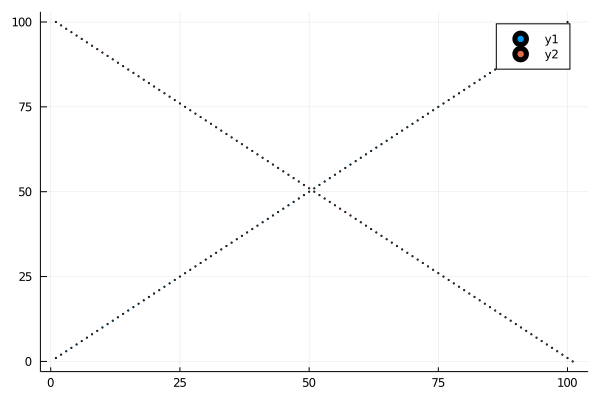

In [45]:
scatter(1:100, markersize=1)
scatter!(100:-1:0, markersize = 1)

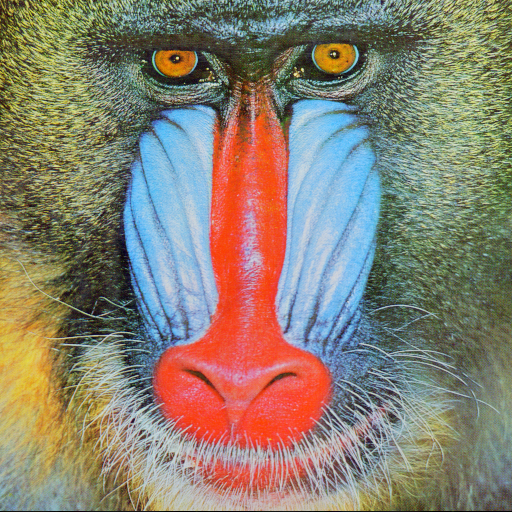

In [24]:
using TestImages, Images, ImageView
testimage("mandrill")

In [17]:
?Images


search: Images nimages ImageDistances TestImages ImageAxes ImageTransformations



Constructors, conversions, and traits:

```
- Construction: use constructors of specialized packages, e.g., `AxisArray`, `ImageMeta`, etc.
- "Conversion": `colorview`, `channelview`, `rawview`, `normedview`, `permuteddimsview`
- Traits: `pixelspacing`, `sdims`, `timeaxis`, `timedim`, `spacedirections`
```

Contrast/coloration:

```
- `clamp01`, `clamp01nan`, `scaleminmax`, `colorsigned`, `scalesigned`
```

Algorithms:

```
- Reductions: `maxfinite`, `maxabsfinite`, `minfinite`, `meanfinite`, `integral_image`, `boxdiff`, `gaussian_pyramid`
- Resizing: `restrict`, `imresize` (not yet exported)
- Filtering: `imfilter`, `imfilter!`, `mapwindow`, `imROF`, `padarray`
- Filtering kernels: `Kernel.` or `KernelFactors.`, followed by `ando[345]`, `guassian2d`, `imaverage`, `imdog`, `imlaplacian`, `prewitt`, `sobel`
- Exposure : `imhist`, `histeq`, `adjust_gamma`, `histmatch`, `imadjustintensity`, `imstretch`, `imcomplement`, `clahe`, `cliphist`
- Gradients: `backdiffx`, `backdiffy`, `forwarddiffx`, `forwarddiffy`, `imgradients`
- Edge detection: `imedge`, `imgradients`, `thin_edges`, `magnitude`, `phase`, `magnitudephase`, `orientation`, `canny`
- Corner detection: `imcorner`,`imcorner_subpixel`, `harris`, `shi_tomasi`, `kitchen_rosenfeld`, `meancovs`, `gammacovs`, `fastcorners`
- Blob detection: `blob_LoG`, `findlocalmaxima`, `findlocalminima`
- Morphological operations: `dilate`, `erode`, `closing`, `opening`, `tophat`, `bothat`, `morphogradient`, `morpholaplace`, `feature_transform`, `distance_transform`, `convexhull`
- Connected components: `label_components`, `component_boxes`, `component_lengths`, `component_indices`, `component_subscripts`, `component_centroids`
- Interpolation: `bilinear_interpolation`
```

Test images and phantoms (see also TestImages.jl):

```
- `shepp_logan`
```


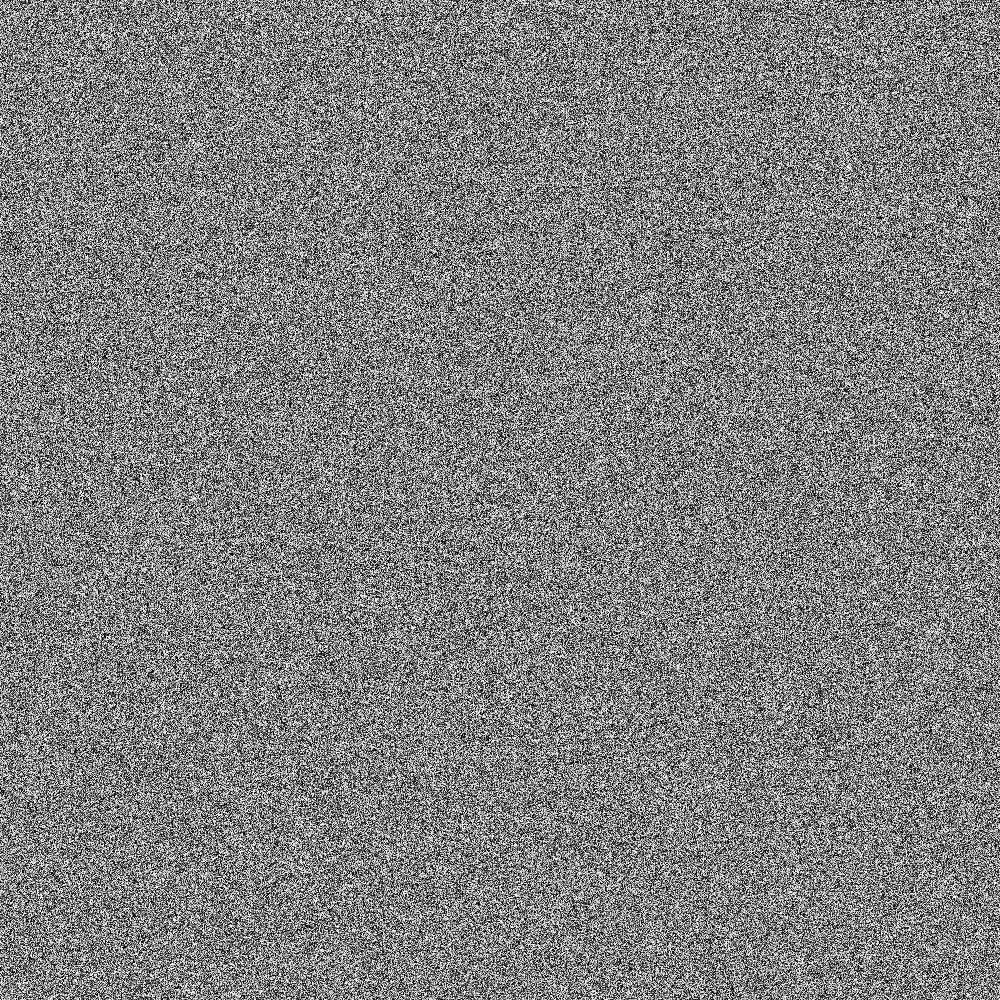

In [35]:
using Colors, Images, ImageView
img = rand(1000,1000) # Pure Noise
Gray.(img)

In [38]:
Arra = [1  2  3; 2  3  4; 0  1  1]

3×3 Array{Int64,2}:
 1  2  3
 2  3  4
 0  1  1

In [40]:
bool(3)

LoadError: UndefVarError: bool not defined

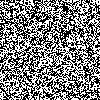

In [52]:
arr = rand(100,100)
arr = map(x -> (x > 0.5), arr)
Gray.(arr)

In [53]:
typeof((1, 1))

Tuple{Int64,Int64}

In [89]:
trunc(Int64, 1.2)

1